In [1]:
import math
import pandas as pd
import librosa
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
import numpy as np

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Importujeme potrebné knižnice a nastavíme štýl zobrazovania grafov 

In [2]:
x, Fs = librosa.load("../Mykola/bakalarka/sounds02/piano.wav") # cesta na .wav file 
y, Fs = librosa.load("../Mykola/bakalarka/sounds02/sax-phrase-short.wav") # cesta na .wav file 
Ts = 1/Fs
N = len(x)
M = len(y)

Nahráme dva súbory .wav 'x' a 'y' a určíme frekvenciu, určíme časový interval vzorky signálu 'x' a 'y' a počet vzoriek v každej z nich

In [3]:
rhodB = -3
roh = 10**(rhodB/20)

xRMS = math.sqrt((1/N)*sum(np.power(x,2)))
yRMS = math.sqrt((1/M)*sum(np.power(y, 2)))

Nastavime konštantu rhodB a vypočítame z nej prahovú hodnotu roh, vypočítame RMS amplitúdu pre signály 'x' a 'y'

In [4]:
alpha = roh * (xRMS/yRMS)
yNorm = alpha * y

Nájdeme normalizačný koeficient alfa a pomocou výsledného koeficientu normalizujeme signál y

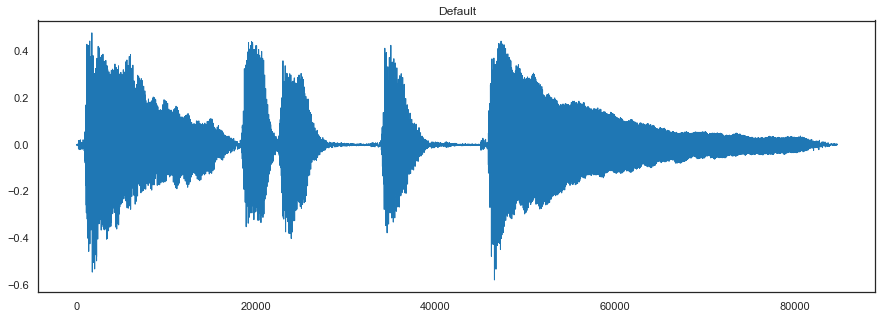

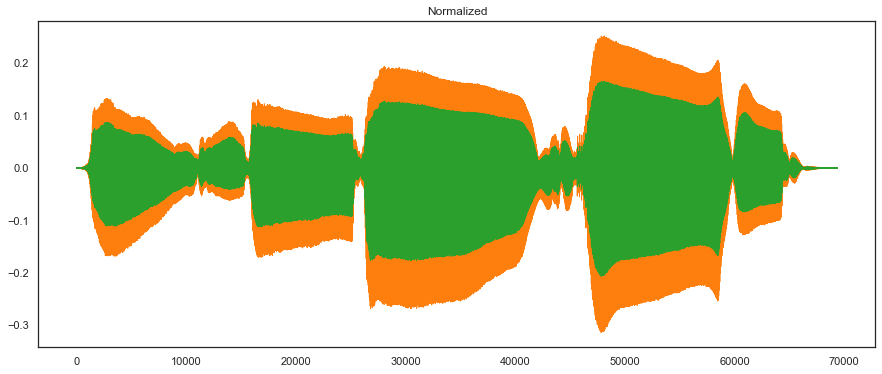

In [8]:
pd.Series(x).plot(figsize=(15,5),
                  lw=1,
                  title='Default',
                  color=color_pal[0])
plt.show()
pd.Series(y).plot(figsize=(15,7),
                  lw=1,
                  title='Normalized',
                  color=color_pal[1])
pd.Series(yNorm).plot(figsize=(15,6),
                  lw=1,
                  color=color_pal[2])
plt.show()

Na grafoch vidíme tri čiary - pôvodný signál x, normalizovaný signál yNorm a pôvodný signál y. Grafy ukazujú, ako sa menia amplitúdy týchto signálov.
Amplitúdy normalizovaného signálu yNorm sú v priemere blízke amplitúdam signálu x, čo znamená, že boli znížené o rovnakú hodnotu, aby sa dosiahol väčší objem vzhľadom na signál x.
Pôvodný signál y má v priemere vyššie amplitúdy ako signál x, čo môže znamenať, že obsahuje hlasitejšiu informáciu ako signál x.